
# Análise Exploratória de Dados (EAD)

Este notebook realiza a análise exploratória de dados (EAD) com base no conjunto de dados fornecido. As principais etapas incluem a importação dos dados, verificação de dados ausentes, verificação de duplicados, análise descritiva, visualizações e conversão de variáveis categóricas.

## Passos:

1. **Carregar os Dados**: Carregar o conjunto de dados a partir de um arquivo CSV.
2. **Verificação de Tipos de Dados**: Verificar os tipos de dados para garantir que as colunas estão corretamente tipadas.
3. **Verificação de Valores Ausentes**: Identificar e tratar valores ausentes.
4. **Verificação de Duplicados**: Identificar e remover linhas duplicadas.
5. **Conversão de Variáveis Categóricas**: Aplicar One-Hot Encoding em variáveis categóricas para transformá-las em variáveis numéricas.
6. **Estatísticas Descritivas**: Exibir estatísticas descritivas para variáveis numéricas.
7. **Visualizações**: Realizar visualizações para explorar a distribuição de variáveis numéricas e identificar outliers.
8. **Correlação entre Variáveis**: Calcular e visualizar a correlação entre variáveis numéricas.
9. **Detecção de Outliers**: Identificar e remover outliers utilizando o intervalo interquartil (IQR).
10. **Criação de Faixas Etárias**: Criar uma nova variável que classifique os clientes em faixas etárias.
11. **Frequências de Compra**: Analisar a distribuição das frequências de compra dos clientes.
12. **Relação entre Idade e Valor de Compra**: Explorar a relação entre idade e valor de compra.

## Código

A seguir está o código associado a cada uma dessas etapas.


Tipos de dados: Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object
Valores ausentes por coluna: Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color            

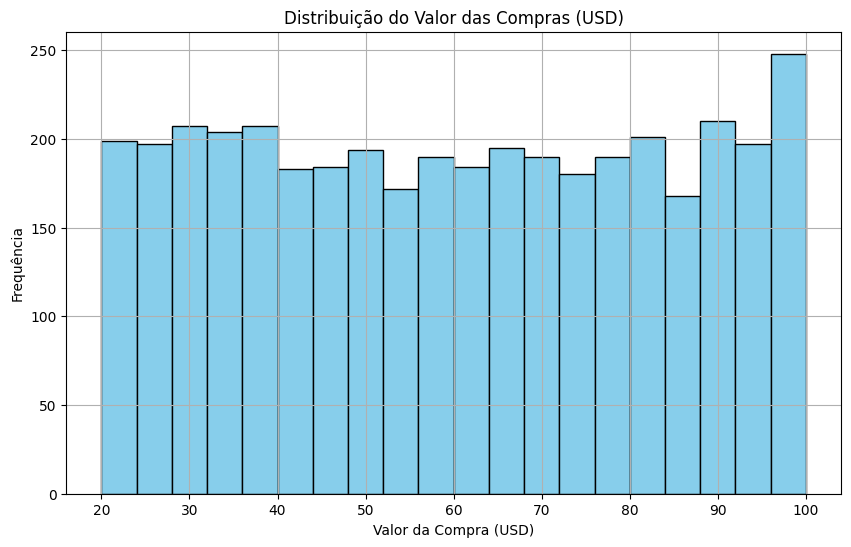

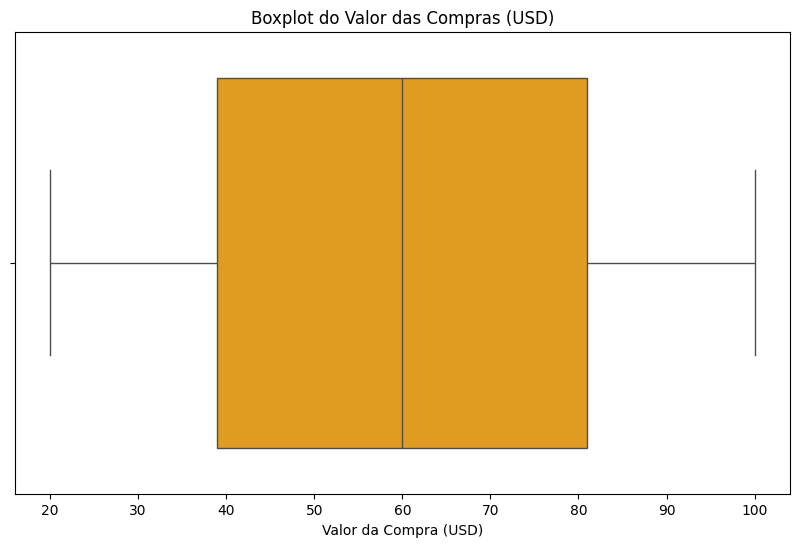

Matriz de Correlação:                        Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


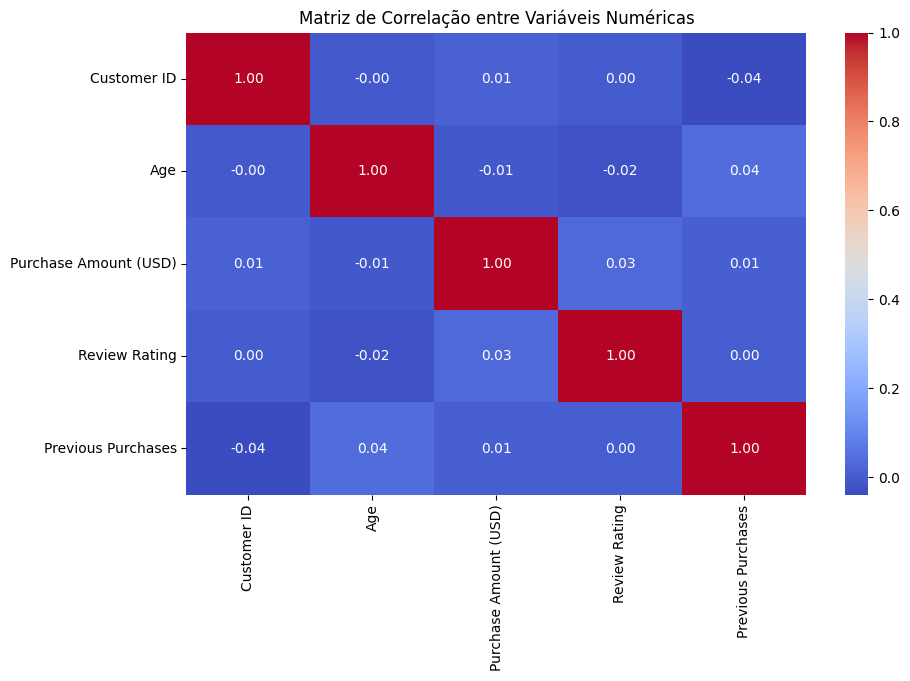

Distribuição das faixas etárias: Age Group
Adulto        1605
Meia-Idade    1503
Idoso          723
Jovem           69
Name: count, dtype: int64
Distribuição das Frequências de Compras: Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


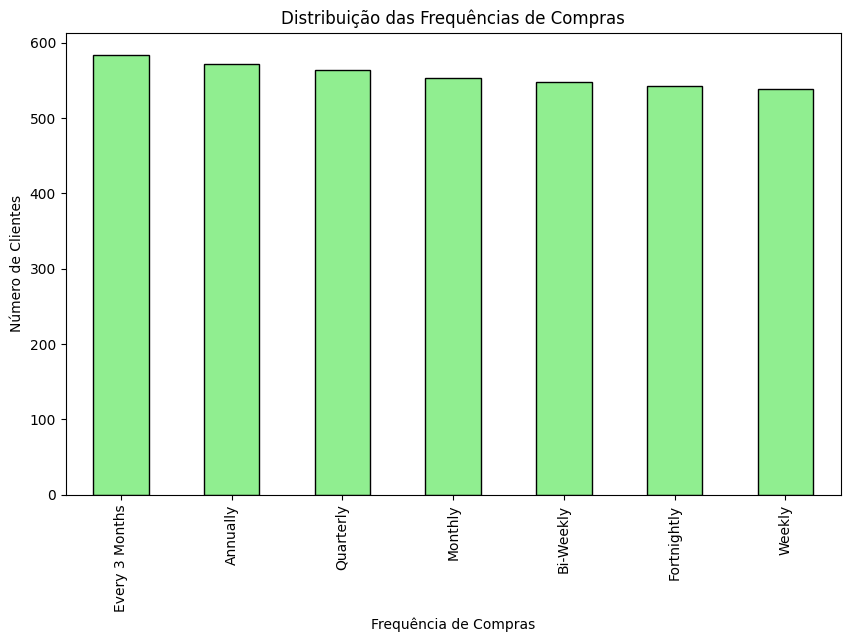

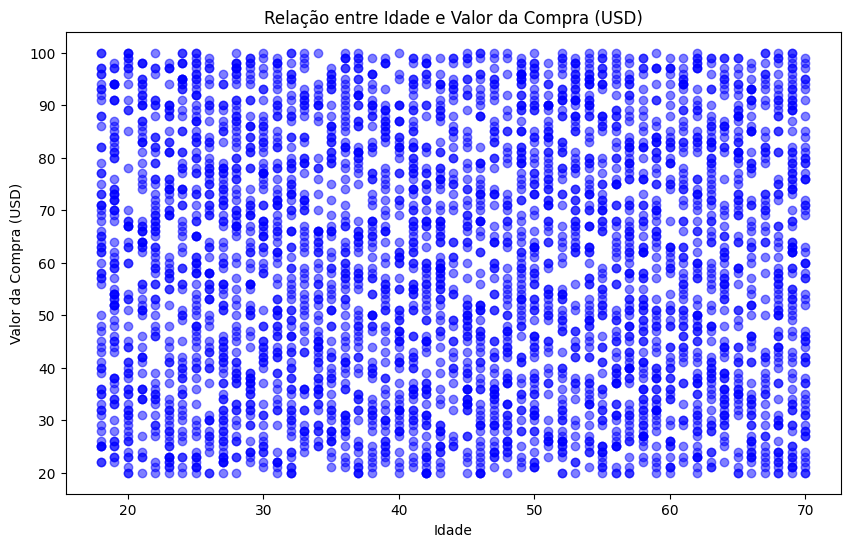

Valores ausentes após limpeza: Customer ID                 0
Age                         0
Item Purchased              0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
Gender_Male                 0
Category_Clothing           0
Category_Footwear           0
Category_Outerwear          0
Age Group                   0
dtype: int64
Número de linhas duplicadas após limpeza: 0


In [ ]:

# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Carregar os Dados
# Carregar o arquivo CSV
df = pd.read_csv('../data/shopping_trends.csv')

# Passo 2: Verificação de Tipos de Dados
# Exibir os tipos de dados para garantir que as colunas estão corretamente tipadas
print("Tipos de dados:", df.dtypes)

# Passo 3: Verificação de Valores Ausentes
# Identificar se há valores ausentes em qualquer coluna
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:", missing_values)

# Verificar a porcentagem de valores ausentes
missing_percentage = (df.isnull().mean() * 100).round(2)
print("Porcentagem de valores ausentes por coluna:", missing_percentage)

# Passo 4: Verificação de Duplicados
# Identificar e remover linhas duplicadas
duplicates = df.duplicated().sum()
print("Número de linhas duplicadas:", duplicates)

# Remover duplicados
df.drop_duplicates(inplace=True)

# Passo 5: Conversão de Variáveis Categóricas para Variáveis Dummy (One-Hot Encoding)
# As colunas 'Gender' e 'Category' são categóricas, então vamos convertê-las para variáveis dummy
df = pd.get_dummies(df, columns=['Gender', 'Category'], drop_first=True)

# Passo 6: Estatísticas Descritivas
# Exibir estatísticas descritivas para variáveis numéricas
print("Estatísticas descritivas:", df.describe())

# Passo 7: Visualizações - Distribuição de Variáveis Numéricas
# Visualizar a distribuição da variável 'Purchase Amount (USD)'
plt.figure(figsize=(10, 6))
df['Purchase Amount (USD)'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Valor das Compras (USD)')
plt.xlabel('Valor da Compra (USD)')
plt.ylabel('Frequência')
plt.show()

# Passo 8: Visualizações - Boxplot para Identificar Outliers
# Boxplot para a variável 'Purchase Amount (USD)' para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase Amount (USD)'], color='orange')
plt.title('Boxplot do Valor das Compras (USD)')
plt.xlabel('Valor da Compra (USD)')
plt.show()

# Passo 9: Análise de Correlação entre Variáveis Numéricas
# Filtrando apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação para as variáveis numéricas
correlation_matrix = numeric_df.corr()
print("Matriz de Correlação:", correlation_matrix)

# Visualização da Matriz de Correlação com Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Passo 10: Verificação de Outliers Usando Intervalo Interquartil (IQR)
# Detectar e remover outliers na variável 'Purchase Amount (USD)' utilizando o IQR
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remover outliers
df = df[(df['Purchase Amount (USD)'] >= lower_limit) & (df['Purchase Amount (USD)'] <= upper_limit)]

# Passo 11: Criação de Faixas Etárias (Novo Grupo)
# Criar uma nova variável para faixa etária (faixa etária por grupos)
bins = [0, 18, 40, 60, 100]
labels = ['Jovem', 'Adulto', 'Meia-Idade', 'Idoso']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Visualizar a nova variável 'Age Group'
print("Distribuição das faixas etárias:", df['Age Group'].value_counts())

# Passo 12: Visualização das Frequências de Compra
# Exibir a distribuição das frequências de compra dos clientes
purchase_frequency = df['Frequency of Purchases'].value_counts()
print("Distribuição das Frequências de Compras:", purchase_frequency)

# Gráfico de barras para mostrar a distribuição de frequências de compras
plt.figure(figsize=(10, 6))
purchase_frequency.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribuição das Frequências de Compras')
plt.xlabel('Frequência de Compras')
plt.ylabel('Número de Clientes')
plt.show()

# Passo 13: Identificação de Relação entre 'Age' e 'Purchase Amount (USD)'
# Gráfico de dispersão entre 'Age' e 'Purchase Amount (USD)'
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.5, color='blue')
plt.title('Relação entre Idade e Valor da Compra (USD)')
plt.xlabel('Idade')
plt.ylabel('Valor da Compra (USD)')
plt.show()

# Passo 14: Verificação de Valores Ausentes Após Limpeza
# Recalcular valores ausentes após os tratamentos
missing_values_after_cleaning = df.isnull().sum()
print("Valores ausentes após limpeza:", missing_values_after_cleaning)

# Passo 15: Verificação de Duplicados Após Limpeza
# Verificar se há duplicados após a remoção
duplicates_after_cleaning = df.duplicated().sum()
print("Número de linhas duplicadas após limpeza:", duplicates_after_cleaning)
